In [3]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
print('Setup complete')

Setup complete


In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

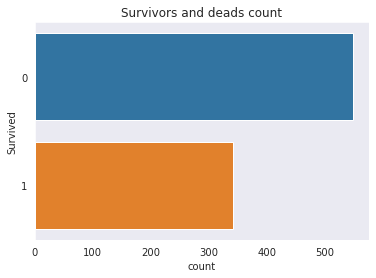

In [9]:
g = sns.countplot(y=train_data['Survived']).set_title('Survivors and deads count')

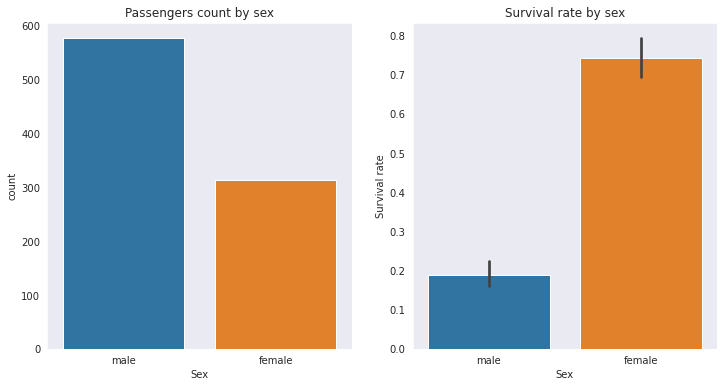

In [10]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(train_data['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [11]:
train_data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

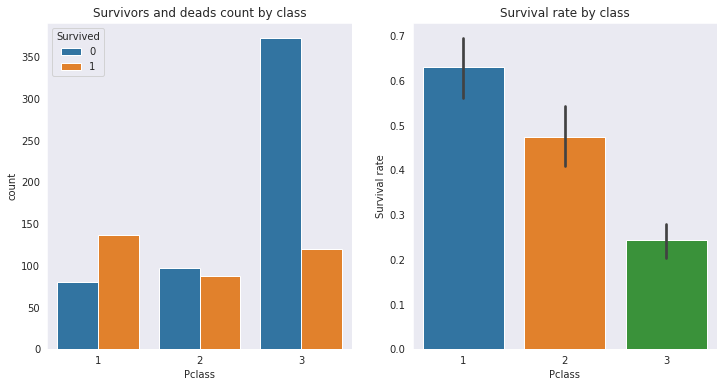

In [12]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train_data, 
                  ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [13]:
train_data.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

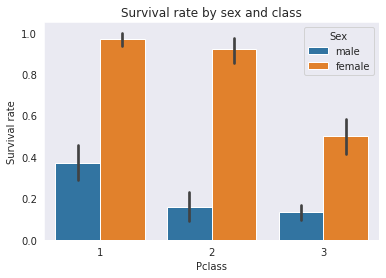

In [14]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data).set_ylabel('Survival rate')

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')
f = sns.distplot(train_data['Age'], color='red', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

In [ ]:
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=train_data).set_title('Survived by age and sex')

In [ ]:
train_data.Fare.describe()

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_data.Fare, color='g', ax=axarr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_data.Survived, ax=axarr[1]).set_ylabel('Survival rate')


In [ ]:
plt.figure(figsize=(8,5))
a = sns.swarmplot(x='Sex', y='Fare', hue='Survived',data=train_data).set_title('Survived by fare and sex')

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')

In [ ]:
g = sns.countplot(data=train_data, x='Embarked', hue='Pclass').set_title('Pclass count by embarking point')

In [ ]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
train_data['Title'].value_counts()

In [ ]:
test_data['Title'].value_counts()

In [ ]:
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [ ]:
train_data.groupby('Title').Survived.mean()

In [ ]:
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', data=train_data).set_ylabel('Survival rate')

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['SibSp'], ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [ ]:
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1

In [ ]:
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

In [ ]:
plt.title('Survival rate by family type')
g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived).set_ylabel('Survival rate')

In [ ]:
y = train_data['Survived']
features = ['Pclass', 'Sex', 'Fare', 'Title', 'Embarked', 'Fam_type']
X = train_data[features]
X.head()

In [ ]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Sex', 'Title', 'Embarked', 'Fam_type']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0, 
                                                               n_estimators=500, max_depth=5))
                             ])

# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

In [ ]:
X_test = test_data[features]
X_test.head()

In [ ]:
# Preprocessing of test data, get predictions
predictions = titanic_pipeline.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')